In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [15]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (8, 5),
    "axes.titlesize": 14,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "font.family": "sans-serif",
    "axes.grid": True,
    "grid.alpha": 0.3
})

In [16]:
df = pd.read_csv("spam.csv" , encoding = "latin-1")
df = df[['v1' , 'v2']]
print(df.info())
df.rename(columns= {'v1':'label' , 'v2' : 'message'}, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

VISUALIZING CLASS DISTRIBUTION


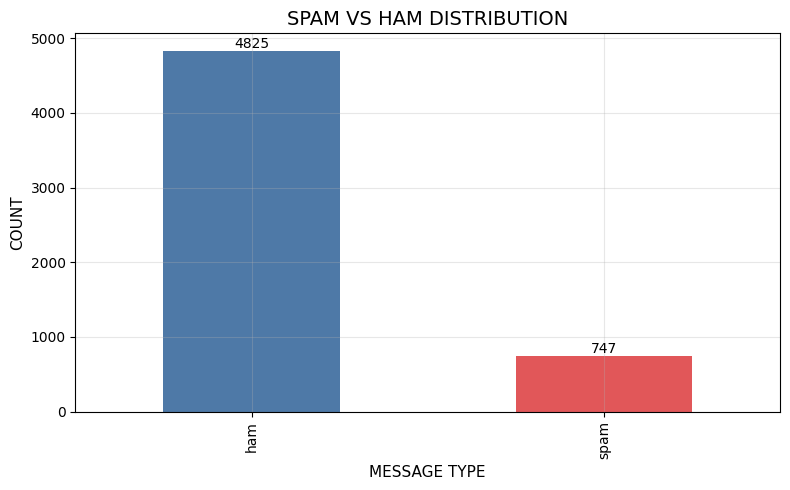

In [19]:
import matplotlib.pyplot as plt

print("=" * 60)
print("VISUALIZING CLASS DISTRIBUTION")
print("=" * 60)

ax = df['label'].value_counts().plot(
    kind='bar',
    color=['#4E79A7', '#E15759']  # Blue (Ham), Red (Spam)
)

# Add count labels on bars
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.title("SPAM VS HAM DISTRIBUTION")
plt.xlabel("MESSAGE TYPE")
plt.ylabel("COUNT")
plt.tight_layout()
plt.show()


In [21]:
#checking missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [22]:
df['message_length'] = df['message'].apply(len)

In [24]:
df[['label' , 'message_length']].head()

,label,message_length
0,ham,111
1,ham,29
2,spam,155
3,ham,49
4,ham,61


In [26]:
df.groupby('label')['message_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,71.023627,58.016023,2.0,33.0,52.0,92.0,910.0
spam,747.0,138.866131,29.183082,13.0,132.5,149.0,157.0,224.0


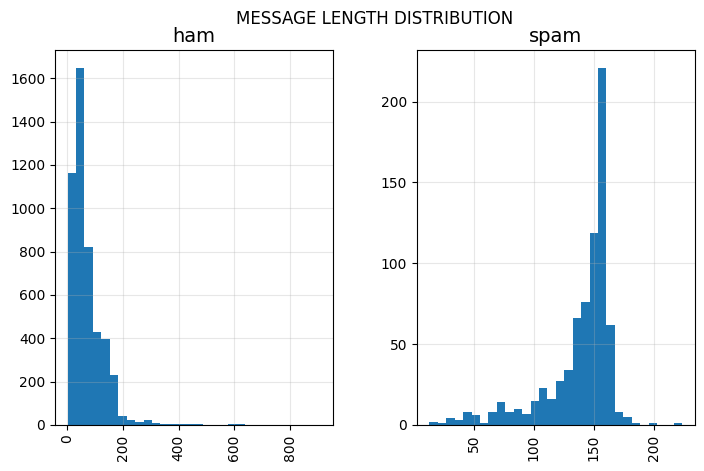

In [29]:
df.hist(column = 'message_length',by='label', bins=30)
plt.suptitle("MESSAGE LENGTH DISTRIBUTION")
plt.show()